<a href="https://colab.research.google.com/github/OumaymaAbayed/Customer-Churn/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Application

In [5]:
install.packages("randomForest")
install.packages("caret")
library(randomForest)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [90]:
data <- read.csv('Customer-Churn.csv')
head(data)
str(data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

## Data Preprocessing

In [91]:
#removing NA values
data <- na.omit(data)

In [92]:
# Convert categorical variables to factors
data$Churn <- as.factor(data$Churn)

In [93]:
# Drop customerID column
data <- data[ , !names(data) %in% c("customerID")]

## Model Training

In [94]:
# Split data into training and testing sets
set.seed(123)
trainIndex <- createDataPartition(data$Churn, p = 0.7, list = FALSE)
trainData <- data[trainIndex, ]
testData <- data[-trainIndex, ]


In [95]:
# Train the Random Forest model
rf_model <- randomForest(Churn ~ ., data = trainData, ntree = 100, mtry = 3)

# Print the model summary
print(rf_model)

# Make predictions
predictions <- predict(rf_model, newdata = testData)


Call:
 randomForest(formula = Churn ~ ., data = trainData, ntree = 100,      mtry = 3) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 20.59%
Confusion matrix:
      No Yes class.error
No  3257 358  0.09903181
Yes  656 653  0.50114591


The Out Of the Bag etsimate of error equals 20.6%

In [22]:
# Use a reliable CRAN mirror and suppress installation messages
options(repos = c(CRAN = "https://cloud.r-project.org"))

# Install packages with quieter output
install.packages(c("rpart", "rpart.plot", "rattle", "RColorBrewer"), quiet = TRUE)

# Load the libraries
library(rpart)
library(rpart.plot)
library(rattle)
library(RColorBrewer)

also installing the dependencies ‘bitops’, ‘XML’


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Attaching package: ‘rattle’


The following object is masked from ‘package:randomForest’:

    importance




In [72]:
d_tree<- rpart(Churn~., data = trainData, method = "class")
d_tree

n= 4924 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 4924 1309 No (0.73415922 0.26584078)  
   2) Contract=One year,Two year 2205  145 No (0.93424036 0.06575964) *
   3) Contract=Month-to-month 2719 1164 No (0.57190143 0.42809857)  
     6) InternetService=DSL,No 1227  354 No (0.71149144 0.28850856)  
      12) tenure>=4.5 755  144 No (0.80927152 0.19072848) *
      13) tenure< 4.5 472  210 No (0.55508475 0.44491525)  
        26) TechSupport=No internet service,Yes 238   76 No (0.68067227 0.31932773) *
        27) TechSupport=No 234  100 Yes (0.42735043 0.57264957) *
     7) InternetService=Fiber optic 1492  682 Yes (0.45710456 0.54289544)  
      14) tenure>=14.5 809  336 No (0.58467244 0.41532756) *
      15) tenure< 14.5 683  209 Yes (0.30600293 0.69399707) *

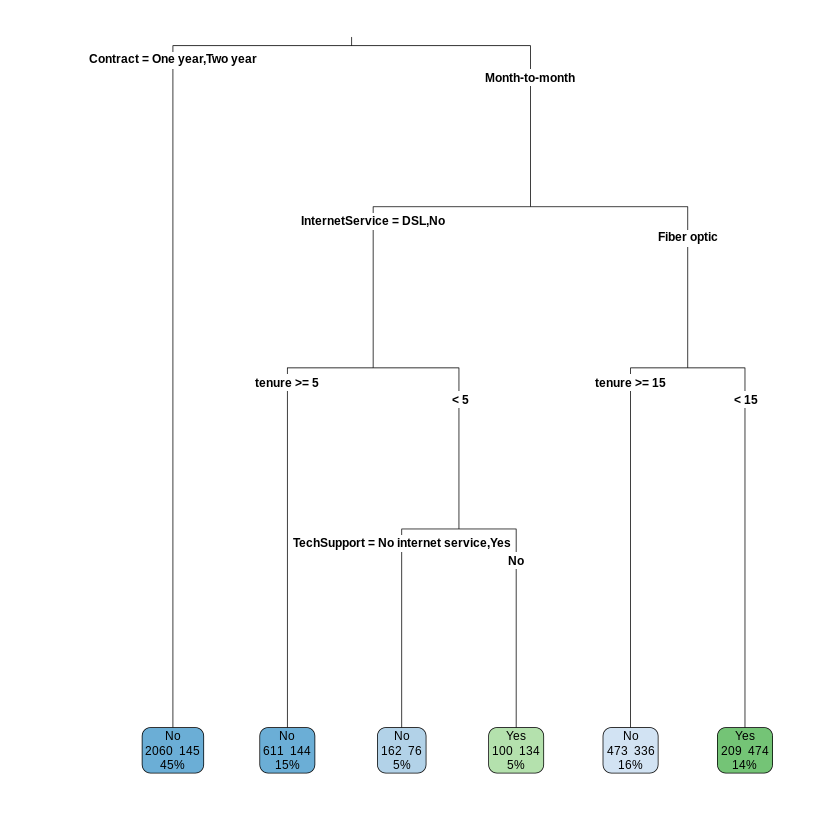

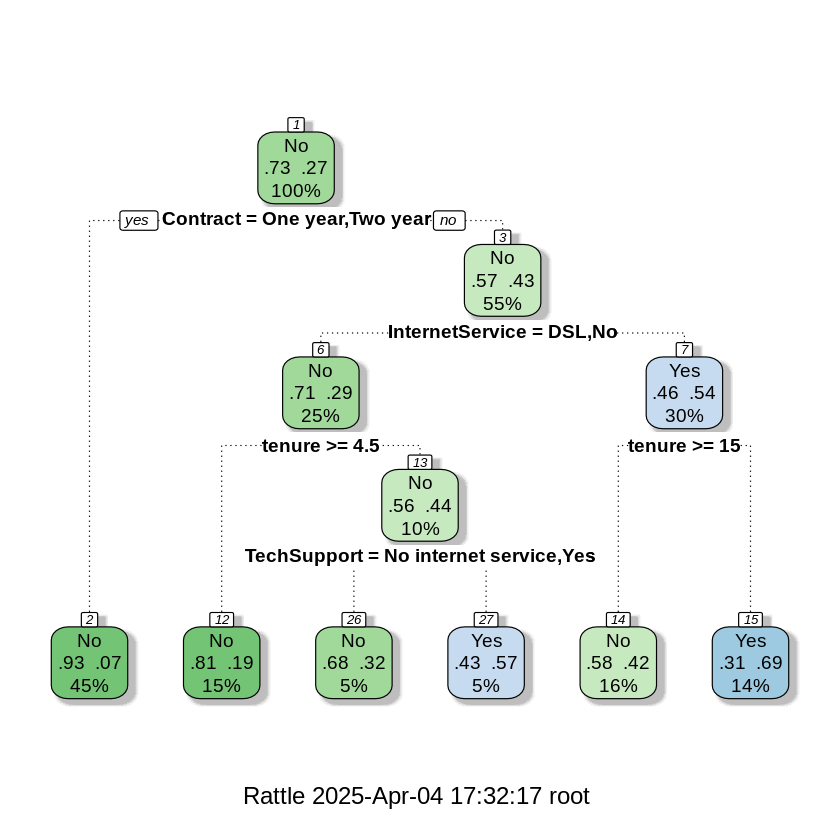

In [73]:
# Basic plot using rpart.plot
rpart.plot(d_tree, type = 3, extra = 101, fallen.leaves = TRUE, cex = 0.6)

# Enhanced plot using rattle
fancyRpartPlot(d_tree)

## Interpretation:
**Root Node:**
* **Contract = One year, Two year (yes):**

  If the customer has a one-year or two-year contract, they are less likely to churn (73% No, 27% Yes).

  This suggests that longer contracts correlate with customer retention.

* **Contract = One year, Two year (no):**

  If the contract is not one or two years (likely month-to-month), the decision moves to the next split.

**Leaf Nodes:**
* Node 2: Long contracts and likely loyal customers (93% No).

* Node 12: DSL/No internet with shorter tenure - still likely to stay (81% No).

* Node 26: Short tenure and no tech support - likely to stay (68% No).

* Node 27: Short tenure and no tech support - more likely to churn (57% Yes).

* Node 14: Medium tenure - less likely to churn (58% No).

* Node 15: Short tenure and other factors - more likely to churn (69% Yes).

## Insights:
**Contract Length Matters:** Longer contractssignificantly reduce churn.

**Internet Service:** DSL or not having internet service is linked to lower churn rates compared to fiber.

**Tenure Impact:** Customers with longer tenure are more likely to stay, while shorter tenure customers are at higher risk of leaving.

**Tech Support:** Lack of tech support combined with short tenure increases churn probability.

## Model Evaluation

In [96]:
# Evaluate model accuracy
conf_matrix <- confusionMatrix(predictions, testData$Churn)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1397  253
       Yes  151  307
                                         
               Accuracy : 0.8083         
                 95% CI : (0.7909, 0.825)
    No Information Rate : 0.7343         
    P-Value [Acc > NIR] : 1.088e-15      
                                         
                  Kappa : 0.4785         
                                         
 Mcnemar's Test P-Value : 5.036e-07      
                                         
            Sensitivity : 0.9025         
            Specificity : 0.5482         
         Pos Pred Value : 0.8467         
         Neg Pred Value : 0.6703         
             Prevalence : 0.7343         
         Detection Rate : 0.6627         
   Detection Prevalence : 0.7827         
      Balanced Accuracy : 0.7253         
                                         
       'Positive' Class : No             
                                         


## Interpretation
**Good Overall Accuracy** (80.83%), but the model is better at predicting non-churners (No) than churners (Yes).

**High Sensitivity** (90.25%) for predicting non-churn, but low specificity (54.82%) for predicting churn.

**Moderate Kappa** (0.4785) indicates that while the model is better than random guessing, there is room for improvement.


# Model Tuning
## 1. Check Variable Importance

                 MeanDecreaseGini
gender                   36.47019
SeniorCitizen            30.14383
Partner                  33.32927
Dependents               27.12643
tenure                  246.53772
PhoneService              9.70099
MultipleLines            35.62856
InternetService          55.99744
OnlineSecurity           82.82067
OnlineBackup             43.75441
DeviceProtection         39.24614
TechSupport              60.52308
StreamingTV              30.25109
StreamingMovies          30.31160
Contract                136.96168
PaperlessBilling         37.54249
PaymentMethod            75.67810
MonthlyCharges          236.06752
TotalCharges            258.11659


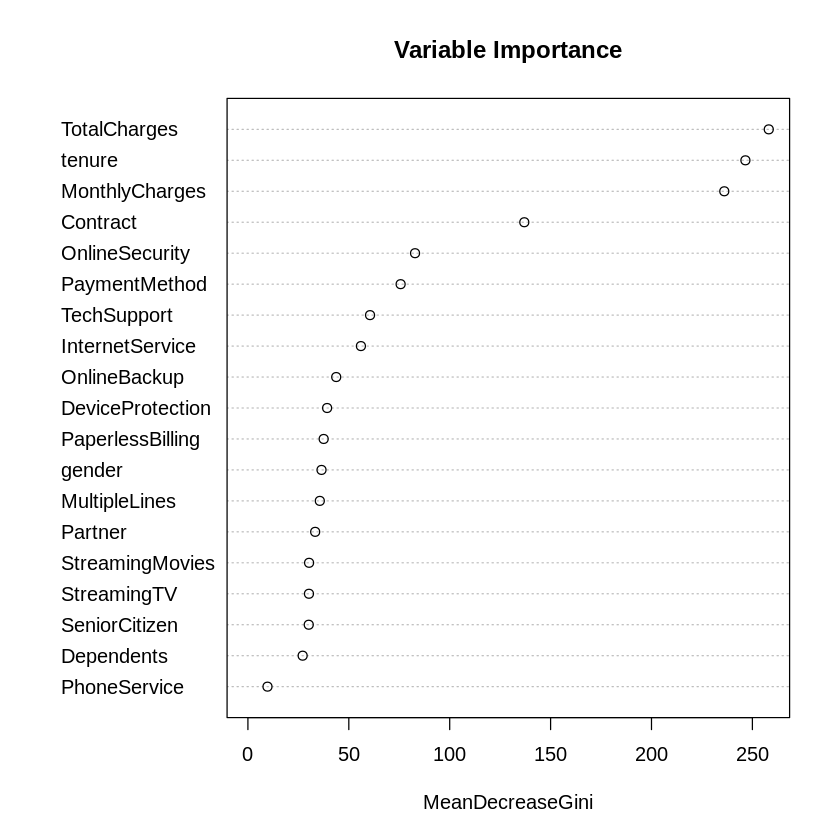

In [75]:
# Check variable importance
importance <- varImpPlot(rf_model, main = "Variable Importance")
print(importance)


Setting direction: controls > cases



Area under the curve: 0.835

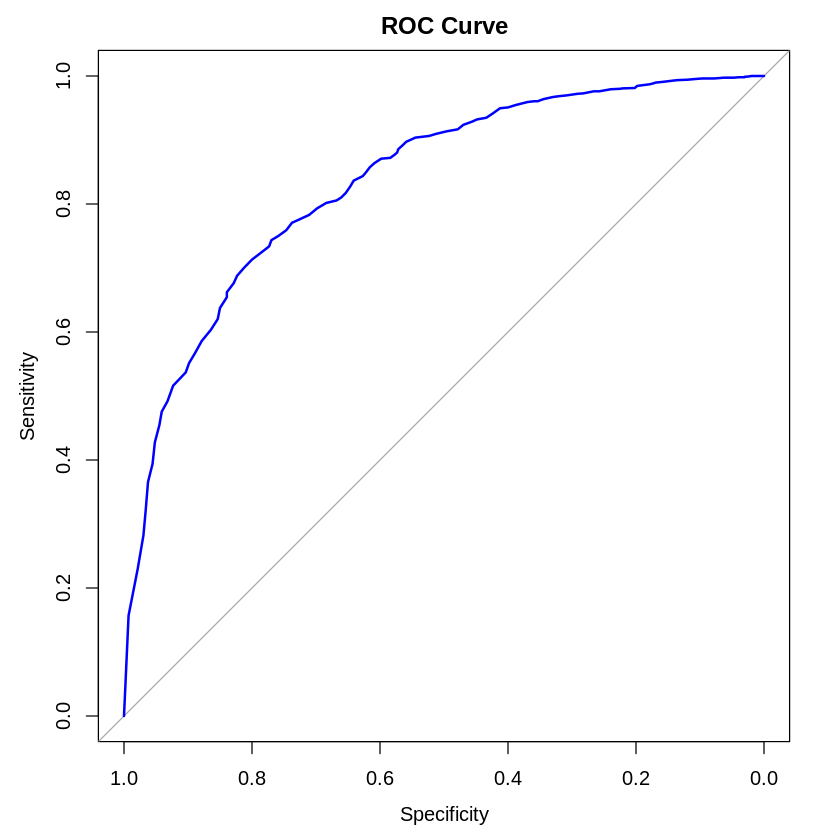

In [77]:
# Predict probabilities for ROC curve
probabilities <- predict(rf_model, newdata = testData, type = "prob")

# ROC and AUC
roc_curve <- roc(testData$Churn, probabilities[,2], levels = rev(levels(testData$Churn)))
plot(roc_curve, col = "blue", main = "ROC Curve")
auc(roc_curve)


## 2. Hyperparameter Tuning

Random Forest 

4924 samples
  19 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 3940, 3939, 3939, 3939, 3939, 3939, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7845254  0.3406704
   4    0.7982685  0.4405570
   6    0.7978628  0.4422885
   8    0.7914995  0.4271461
  10    0.7891298  0.4203455

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.


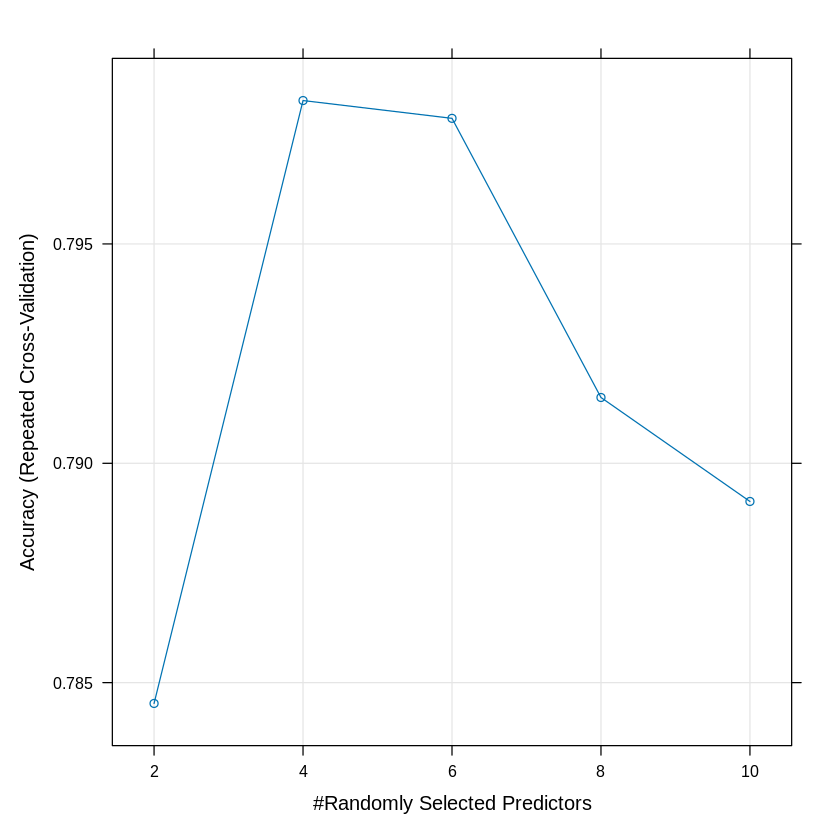

In [82]:
# Create a tuning grid
tuning_grid <- expand.grid(.mtry = c(2, 4, 6, 8, 10))

# Cross-validation setup
control <- trainControl(method = "repeatedcv", number = 5, repeats = 3)

# Train the Random Forest model with hyperparameter tuning
set.seed(456)
tuned_rf <- train(Churn ~ ., data = trainData,
                 method = "rf",
                 metric = "Accuracy",
                 tuneGrid = tuning_grid,
                 trControl = control)

# Print the best model
print(tuned_rf)

# Plot the tuning results
plot(tuned_rf)


In [79]:
# Predict using the tuned model
tuned_predictions <- predict(tuned_rf, newdata = testData)

# Confusion matrix
tuned_conf_matrix <- confusionMatrix(tuned_predictions, testData$Churn)
print(tuned_conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1390  250
       Yes  158  310
                                          
               Accuracy : 0.8065          
                 95% CI : (0.7889, 0.8231)
    No Information Rate : 0.7343          
    P-Value [Acc > NIR] : 5.869e-15       
                                          
                  Kappa : 0.4765          
                                          
 Mcnemar's Test P-Value : 6.632e-06       
                                          
            Sensitivity : 0.8979          
            Specificity : 0.5536          
         Pos Pred Value : 0.8476          
         Neg Pred Value : 0.6624          
             Prevalence : 0.7343          
         Detection Rate : 0.6594          
   Detection Prevalence : 0.7780          
      Balanced Accuracy : 0.7258          
                                          
       'Positive' Class : No              
                        

After tuning, the model's overall accuracy decreased slightly, but specificity improved a bit. Sensitivity dropped marginally, while balanced accuracy remained almost the same. The increase in PPV indicates a slightly better prediction for the "No" class, but the drop in NPV suggests a slight decline for the "Yes" class.

It seems that the tuning did not significantly enhance the model's performance and might have slightly compromised some aspects of its prediction capability.

It seems that the best model is the initial model